In [4]:
import numpy as np
from matplotlib import pyplot as pl
import numpy.ma as ma
import matplotlib
import gxutil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(18,18)

%matplotlib inline

In [5]:
import ebf

In [6]:
data=ebf.read('/Users/TzeGoh/Desktop/Galaxia/halo02_msto_subsample.ebf')

In [7]:
data.keys()

['rad',
 'exbv_solar',
 'teff',
 'mag2',
 'mag1',
 'mag0',
 'dcmc_h',
 'dcmc_i',
 'dcmc_j',
 'satid',
 'vx',
 'vy',
 'vz',
 'mtip',
 'log',
 'pz',
 'px',
 'py',
 'feh',
 'dcmc_ks',
 'exbv_schlegel',
 'lum',
 'exbv_schlegel_inf',
 'mact',
 'glon',
 'popid',
 'glat',
 'alpha',
 'center',
 'partid',
 'age',
 'grav',
 'smass',
 'fieldid']

In [8]:
len(data['lum'])

18208538

In [9]:
sp = ebf.read('/Users/TzeGoh/Desktop/Galaxia/satprop.ebf')

In [10]:
sp.keys()

['jsat', 'log', 'msat', 'bsat', 'nsat', 'esat', 'tsat', 'nsatc', 'lsat']

In [11]:
print(data['log'])

[ '# File generated by 0.7.1\n# <parameterfile>\noutputFile                          halo02\noutputDir                           /Users/robyn/Documents/Research/ColumbiaUndergrads/Galaxia/\nphotoSys                            DCMC\nmagcolorNames                       Ks,J-Ks\nappMagLimits[0]                     -1000\nappMagLimits[1]                     24.5\nabsMagLimits[0]                     -1000\nabsMagLimits[1]                     1000\ncolorLimits[0]                      0\ncolorLimits[1]                      1\ngeometryOption                      0\nstarType                            0\nphotoError                          0\nsurveyArea                          207.455\nfSample                             0.01\npopID                               10\nwarpFlareOn                         0\nlongitude                           76.273\nlatitude                            13.4725\nseed                                17\nr_max                               1000\n# codeDataDir        

In [12]:
#gxutil.abs2app(data,corr=True,noext=True,dered=True)

In [13]:
gxutil.append_pm(data)

In [14]:
mwd = np.zeros_like(data['grav'],dtype=bool)
mwd[data['grav']<2]=True

In [15]:
d = np.sqrt(data['px']**2+data['py']**2+data['pz']**2)

(-200, 200)

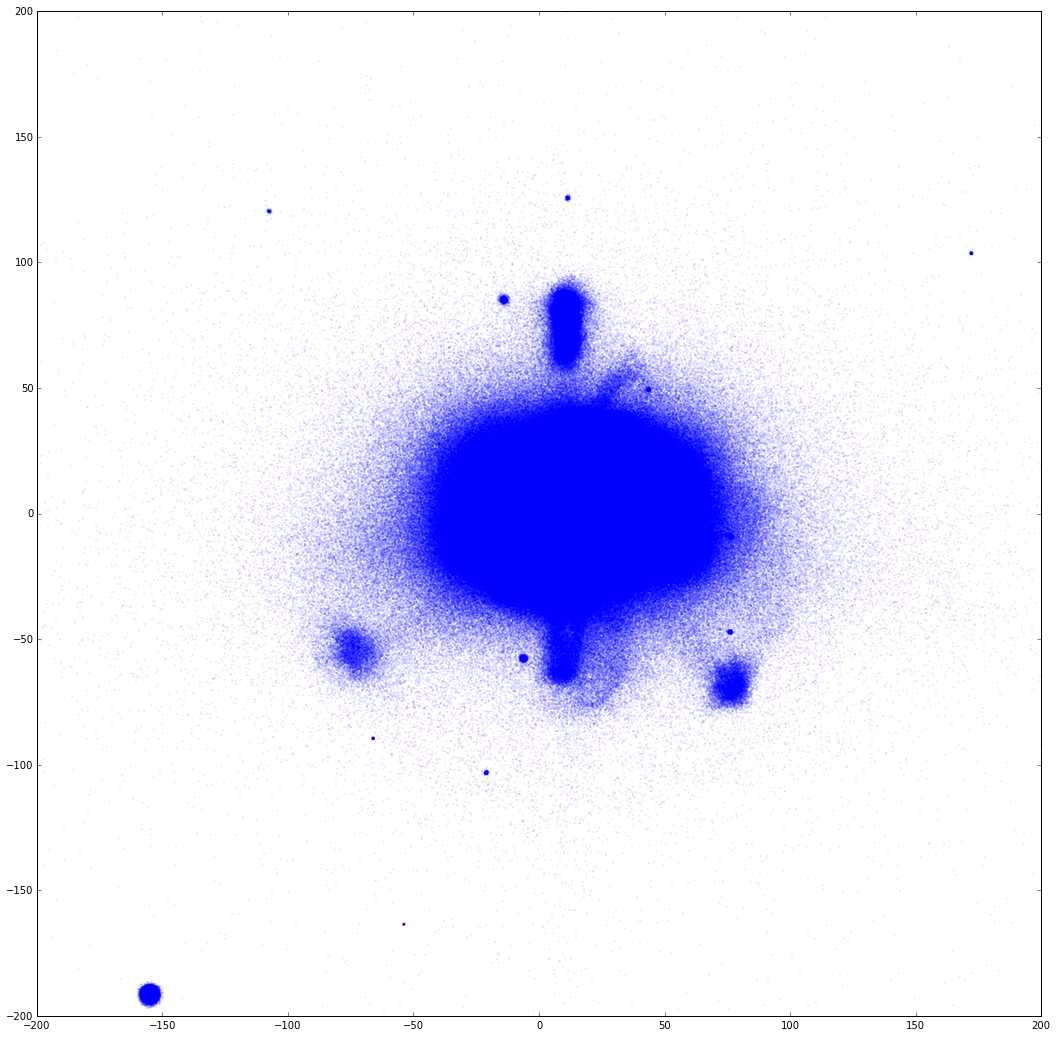

In [16]:
'''This cell changes the position from heliocentric to galactic coordinates'''
plt.rcParams['figure.figsize']=(18,18)
from astropy import units as u
from astropy.coordinates import SkyCoord
pl.plot(data['px']-data['center'][0],data['pz']-data['center'][2],'.',ms=1,alpha=0.3)
pl.xlim(-200,200)
pl.ylim(-200,200)

18208538


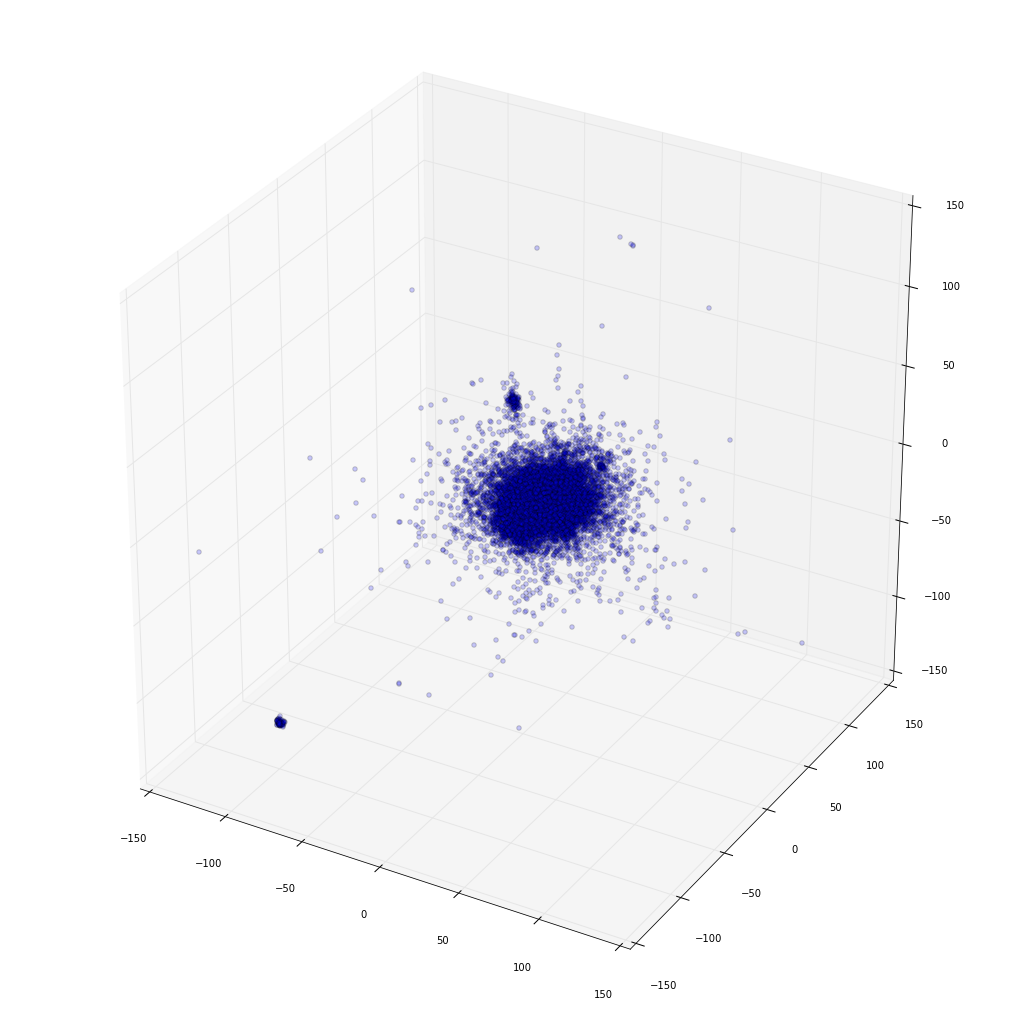

In [30]:
'''The plot now in 3D'''
plt.rcParams['figure.figsize']=(18,18)
x_al = data['px']-data['center'][0]
y_al = data['py']-data['center'][1]
z_al = data['pz']-data['center'][2]

fig = plt.figure()
ax=fig.add_subplot(111, projection = '3d')
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150,150)
print len(x_al)
for i in range(len(x_al)):
    if i % 1000 == 0:
        ax.scatter(x_al[i],y_al[i],z_al[i],alpha=0.2)

In [18]:
'''This cell changes the heliocentric to galactic coordinates'''
a=(data['px']-data['center'][0])
b=(data['py']-data['center'][1])
c=(data['pz']-data['center'][2])
   
d = np.sqrt(a**2 + b**2 + c**2)

In [19]:
'''This cell converts our distance function to Skycoords'''
from astropy import units as u
from astropy.coordinates import SkyCoord

c1 = SkyCoord(x = a[(d>50)*(d<100)],y = b[(d>50)*(d<100)],z = c[(d>50)*(d<100)],unit='kpc',representation='cartesian')
c2 = SkyCoord(x = a[(d>100)],y = b[(d>100)],z = c[(d>100)],unit='kpc',representation='cartesian')

print c1 
print c2

<SkyCoord (ICRS): (x, y, z) in kpc
    [(44.14014435, -37.67186356, 49.01734924),
     (43.80826569, -37.5811882, 49.44451904),
     (43.97758484, -38.62669373, 48.95452499), ...,
     (49.10494614, 9.51050949, -6.46000385),
     (67.81617737, -10.75542259, -12.13284302),
     (-21.86979675, -40.00351715, 23.82764626)]>
<SkyCoord (ICRS): (x, y, z) in kpc
    [(-65.71218872, 154.96211243, -89.5765152),
     (-65.95028687, 154.7718811, -89.74674225),
     (-66.17494965, 154.89376831, -89.44902039), ...,
     (117.42957306, -56.5753479, 14.23766136),
     (37.79720688, -110.60049438, -0.18211167),
     (166.14033508, 135.44082642, -93.52928162)]>


In [20]:
l1=c1.galactic.l.wrap_at(180.*u.deg).radian
b1=c1.galactic.b.radian

In [21]:
npsat=[]
for i in np.unique(data['satid']):
    sat_sel = (data['satid'][(d>50)*(d<100)]==i)
    npsat.append(sat_sel.sum())
nps=np.array(npsat)
print (nps>100).sum()

57


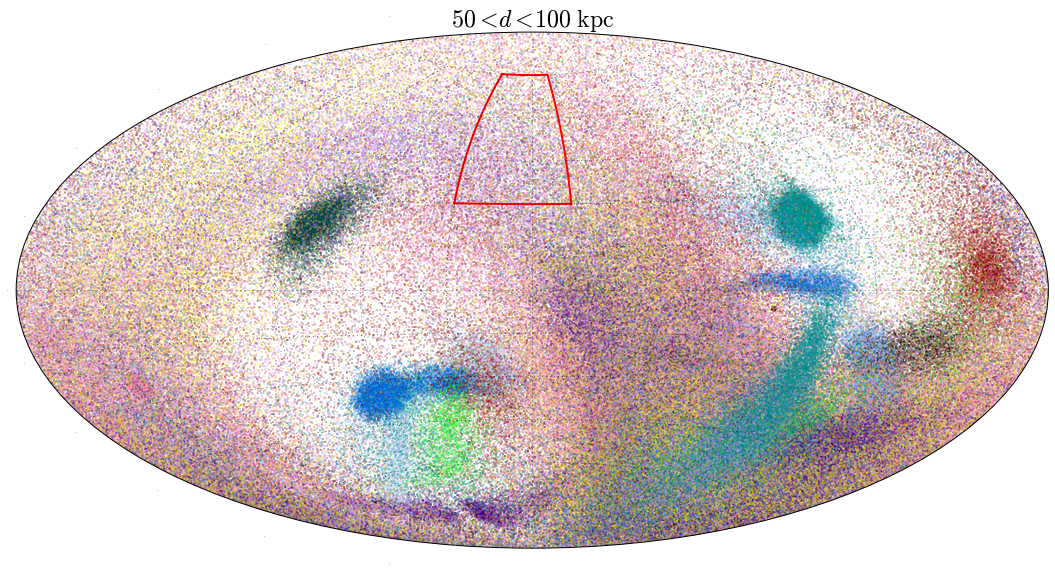

In [22]:
'''The Plot with new galactic coordiniates'''

#set of colorblindness-friendly colors (Okabe & Ito, http://jfly.iam.u-tokyo.ac.jp/color/image/pallete.jpg)
#cbcolors = [(230,159,0),(86,180,233),(0,158,115),(240,228,66),(0,114,178),(213,94,0),(204,121,167)]
cbcolors = [(0,0,0),(0,73,73),(0,146,146),(255,109,182),(255,182,219),(73,0,146),(0,109,219),(182,109,255),(109,182,255),(182,219,255),(146,0,0),(146,73,0),(219,209,0),(36,255,36),(255,255,109),(255,255,0)]
for i in range(len(cbcolors)):
    #scale to 0..1 range
    r,g,b=cbcolors[i]
    cbcolors[i]=(r/255.,g/255.,b/255.)
    
pl.figure(figsize=(16,8))
pl.subplot(111,projection='aitoff')
i=0
for si in np.unique(data['satid']):
    sat_sel = (data['satid'][(d>50)*(d<100)]==si)
    if np.any(sat_sel):
        if sat_sel.sum()<=1000:
            pl.plot(l1[sat_sel],b1[sat_sel],'.k',ms=1,alpha=0.2)
        else:
            pl.plot(l1[sat_sel],b1[sat_sel],'.',ms=1,color=cbcolors[(np.mod(i, len(cbcolors)))])
            i+=1
        
pl.grid()
pl.gca().tick_params(axis='both',labelsize=0)
pl.title('$50<d<100\ \mathrm{kpc}$',fontsize=24)

lmin=np.deg2rad(-30)
lmax=np.deg2rad(15)
bmin=np.deg2rad(30)
bmax=np.deg2rad(75)
pl.plot([lmin, lmin],[bmin,bmax],'r',lw=2)
pl.plot([lmax, lmax],[bmin,bmax],'r',lw=2)
pl.plot([lmin, lmax],[bmin,bmin],'r',lw=2)
pl.plot([lmin, lmax],[bmax,bmax],'r',lw=2)

pl.gcf().tight_layout()

pl.gcf().savefig('MSTO_50_100.png')

In [23]:
l2=c2.galactic.l.wrap_at(180.*u.deg).radian
b2=c2.galactic.b.radian

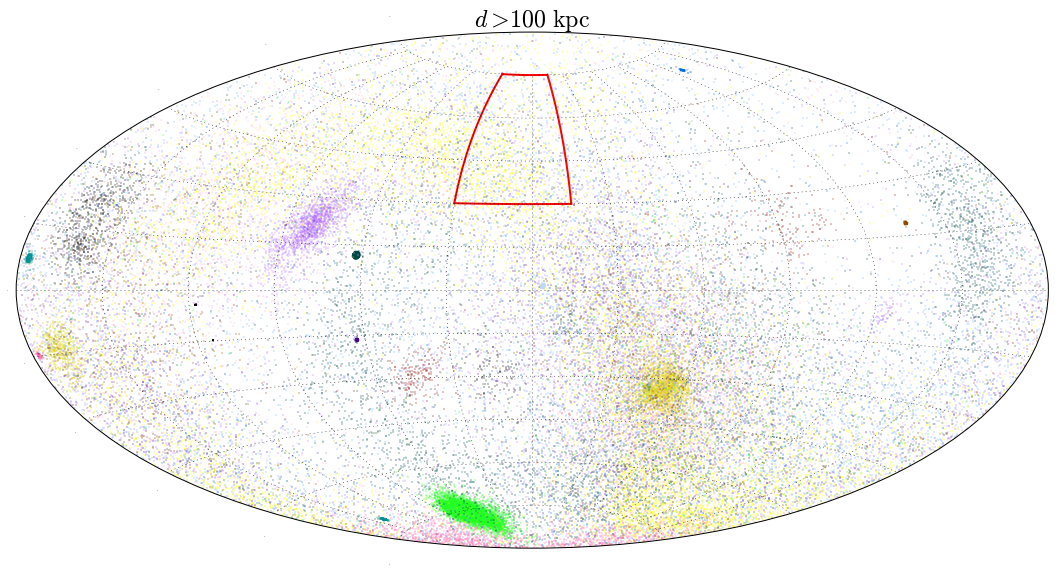

In [24]:
'''The plot with new galactic coordinates'''
pl.figure(figsize=(16,8))
pl.subplot(111,projection='aitoff')
i=0
for si in np.unique(data['satid']):
    sat_sel = (data['satid'][(d>100)]==si)
    if np.any(sat_sel):
        if sat_sel.sum()<=100:
            pl.plot(l2[sat_sel],b2[sat_sel],'.k',ms=1,alpha=0.2)
        else:
            pl.plot(l2[sat_sel],b2[sat_sel],'.',ms=1,color=cbcolors[np.mod(i,len(cbcolors))])
            i+=1

pl.grid()
pl.gca().tick_params(axis='both',labelsize=0)
pl.title('$d>100\ \mathrm{kpc}$',fontsize=24)

pl.plot([lmin, lmin],[bmin,bmax],'r',lw=2)
pl.plot([lmax, lmax],[bmin,bmax],'r',lw=2)
pl.plot([lmin, lmax],[bmin,bmin],'r',lw=2)
pl.plot([lmin, lmax],[bmax,bmax],'r',lw=2)

pl.gcf().tight_layout()
pl.gcf().savefig('MSTO_100.png')

In [25]:
'''Opening the Ascii File'''
f = open('halo02.dat')
hel = []
for line in f:
    hel.append(line)
    

In [26]:
'''Appending the Ascii File into a list'''
length = len(hel)
print length

flow = []
for i in range(length):
    floats = [float(x) for x in hel[i].split()]
    flow.append(floats)    


2391434


In [27]:
'''The Ascii File in x and y'''
print flow[1244340]
print flow[1232]

x = []
y = []
z = []
for i in range(length):
    x.append(flow[i][1])
    y.append(flow[i][2])
    z.append(flow[i][3])

[57.0, -13.319, 23.793, -11.493, -63.224, 130.93, -110.33, -8.9141, -1282.2, -115950.0, 10.206, -1.3388, 0.17064, 105.41]
[1.0, -82.093, 154.64, -89.427, 35.239, 14.649, 39.768, 0.0, -2298.7, -41783.0, 2.6889, -1.2237, -0.32652, 20.558]


In [28]:
cbcolors = [(0,0,0),
            (0,73,73),
            (0,146,146),
            (255,109,182),
            (255,182,219),
            (73,0,146),
            (0,109,219),
            (182,109,255),
            (109,182,255),
            (182,219,255),
            (146,0,0),
            (146,73,0),
            (219,209,0),
            (36,255,36),
            (255,255,109),
            (255,255,0),
           
           ]
# There are 16 distinct colours here
for i in range(len(cbcolors)):
    #scale to 0..1 range
    r,g,b=cbcolors[i]
    cbcolors[i]=(r/255.,g/255.,b/255.)

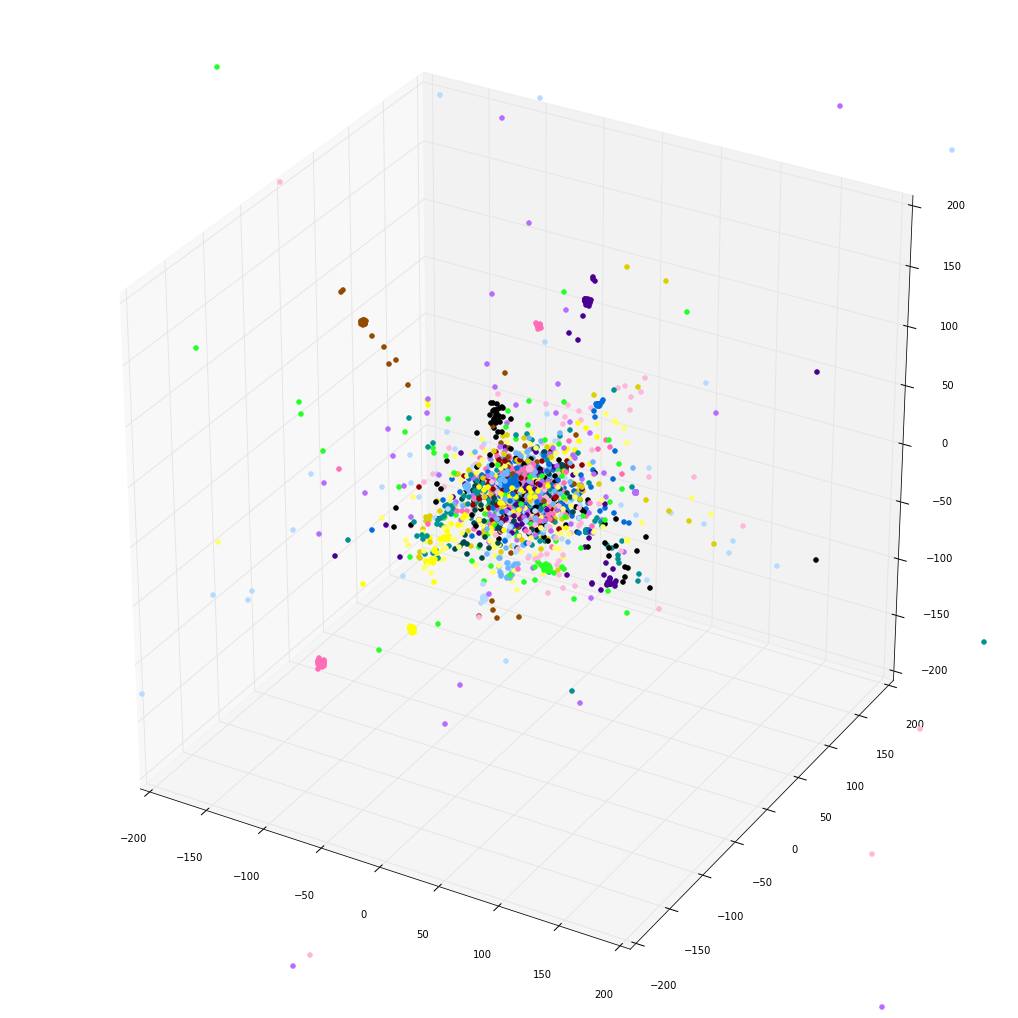

In [29]:
'''This is the color code'''

length = 2391434 
i=0

fig = plt.figure()
ax=fig.add_subplot(111, projection = '3d')
ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)

for line in range(length):
    if line%599 == 0:              # You must input a prime number here 
        i = int(flow[line][0])    # This color-codes it for you  
        ax.scatter(x[line],y[line],z[line],'.',color=cbcolors[(np.mod(i, len(cbcolors)))])
        
plt.gcf().savefig('Color_coded_3d.png')